No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


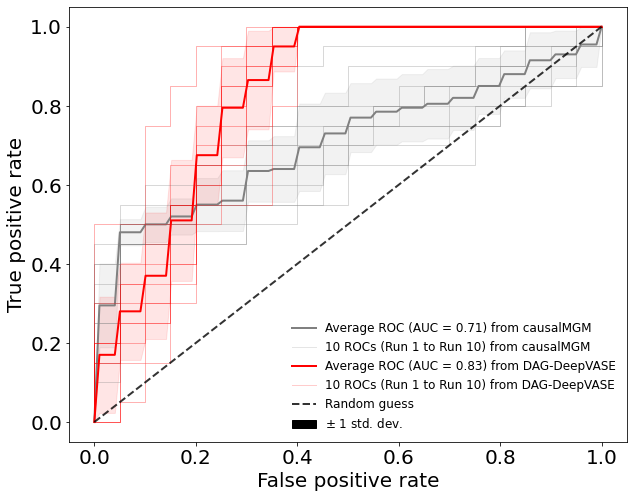

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

import random


fig, ax = plt.subplots(figsize=(10,8))

simDataDir = "nonlinear/";

iterIdxs = [1,2,3,4,5,6,7,8,9,10];


tprsMGM = []
aucsMGM = []
meanFprMGM = np.linspace(0, 1, 100)

for index,iterVal in enumerate(iterIdxs):
    
    #TODO: Load true labels and MGM result and put them in two lists
    labelListMGM = []
    tempLabelListMGM = []
    predictedLabelListMGM = []
    
    #Calculate AUC
    viz = RocCurveDisplay.from_predictions(labelListMGM, predictedLabelListMGM,color="grey",label=None
                                     ,alpha=0.3,lw=1,ax=ax,)#name="ROC from run {}".format(index+1)
    interpTprMGM = np.interp(meanFprMGM, viz.fpr, viz.tpr)
    interpTprMGM[0] = 0.0
    #Store result
    tprsMGM.append(interpTprMGM)
    aucsMGM.append(viz.roc_auc)
    
#Calculate standard deviation and mean
meanTprMGM = np.mean(tprsMGM, axis=0)
meanTprMGM[-1] = 1.0
meanAucMGM = auc(meanFprMGM, meanTprMGM)
stdAucMGM = np.std(aucsMGM)

ax.plot(
    meanFprMGM,
    meanTprMGM,
    color="grey",
    label=r"Average ROC (AUC = %0.2f) from causalMGM" % (meanAucMGM),#$\pm$ %0.2f std_auc
    lw=2,
    #alpha=0.8,
)

stdTprMGM = np.std(tprsMGM, axis=0)
tprsUpperMGM = np.minimum(meanTprMGM + stdTprMGM, 1)
tprsLowerMGM = np.maximum(meanTprMGM - stdTprMGM, 0)
ax.fill_between(
    meanFprMGM,
    tprsLowerMGM,
    tprsUpperMGM,
    color="grey",
    alpha=0.1,
    #label=r"$\pm$ 1 std. dev.",
)
ax.plot([0, 0], [0, 0], lw=1, color="grey", label="10 ROCs (Run 1 to Run 10) from causalMGM", alpha=0.2)




tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for index,iterVal in enumerate(iterIdxs):
    
    resultFileName = "DNN_selected_associations_40p_"+str(iterVal)+"iter.csv";
    
    DNNDF = pd.read_csv(simDataDir+resultFileName,index_col=0);
    selectedFeatures = DNNDF["Feature1"].values.tolist();
    labelList = [];
    predictedLabelList = [];
    
    for i in range(1,21):
        tempStr = "V"+str(i);
        labelList.append(1);
        if tempStr in selectedFeatures:
            tempNum = random.uniform(0.9, 1.0);
            predictedLabelList.append(tempNum);
        else:
            tempNum = random.uniform(0.0, 0.1);
            predictedLabelList.append(tempNum);
    for i in range(21,41):
        tempStr = "V"+str(i);
        #print(tempStr);
        labelList.append(0);
        if tempStr in selectedFeatures:
            tempNum = random.uniform(0.9, 1.0);
            predictedLabelList.append(tempNum);
        else:
            tempNum = random.uniform(0.0, 0.1);
            predictedLabelList.append(tempNum);
    
    viz = RocCurveDisplay.from_predictions(labelList, predictedLabelList,color="red",label=None
                                     ,alpha=0.3,lw=1,ax=ax,)#name="ROC from run {}".format(index+1)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(
    mean_fpr,
    mean_tpr,
    color="red",
    label=r"Average ROC (AUC = %0.2f) from DAG-DeepVASE" % (mean_auc),#$\pm$ %0.2f std_auc
    lw=2,
    #alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="red",
    alpha=0.1,
    #label=r"$\pm$ 1 std. dev.",
)


ax.fill_between([0],[0],[0],color="black",label=r"$\pm$ 1 std. dev.",)
ax.plot([0, 0], [0, 0], lw=1, color="red", label="10 ROCs (Run 1 to Run 10) from DAG-DeepVASE", alpha=0.2)
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="black", label="Random guess", alpha=0.8)

ax.set(xlim=[-0.05, 1.05],ylim=[-0.05, 1.05],)
plt.xlabel("False positive rate",fontsize=20)
plt.ylabel("True positive rate",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(loc="lower right",fontsize=12,frameon=False)
plt.savefig("AverageAUCROC50True50FalseFrom10RepetitionsPartialNonlinearSimulationData.svg")
plt.show()


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

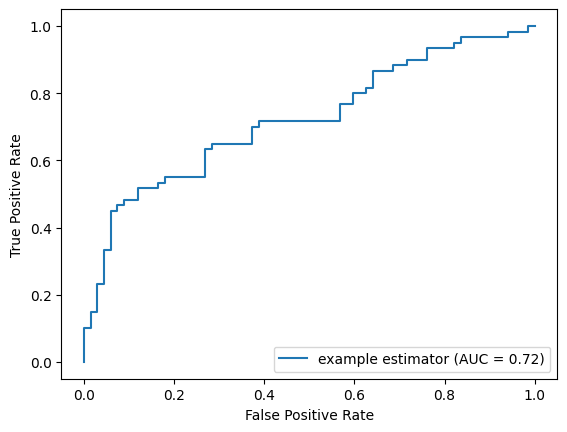

In [4]:
y = np.array([1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])
pred = np.array([0.9745005742, 0.9852895193, 0.9976601073, 0.9176521546, 0.9364274302, 0.0124421503, 0.9995770202, 0.9941729050, 0.9787294178, 0.9582811578, 0.0347800260, 0.0641930205, 0.0243330541, 0.9304465720, 0.0115859232, 0.0744943083, 0.0925819692, 0.9304438869, 0.0353556635, 0.0824834544, 0.0849264829, 0.0757952281, 0.9150900548, 0.0639171749, 0.0476719713, 0.0635908135, 0.0361523515, 0.9323382901, 0.9499525472, 0.9686348435, 0.9705501409, 0.9766113517, 0.9920146478, 0.9707654312, 0.9083328994, 0.0722632278, 0.0750899842, 0.9542598970, 0.0016327473, 0.9562564235, 0.0427265725, 0.0773588008, 0.0406570993, 0.0049657038, 0.9013935502, 0.0744695714, 0.0345900182, 0.0185364427, 0.9710713175, 0.0912978096, 0.0487990002, 0.9968014562, 0.0646909842, 0.9439312017, 0.0182850568, 0.0202928717, 0.0416226428, 0.9517680939, 0.9904843064, 0.0975076688, 0.9757324936, 0.0700109143, 0.0090781542, 0.0065490883, 0.0221777604, 0.0654878059, 0.0507819565, 0.0051119838, 0.0059178119, 0.0501518053, 0.0422139192, 0.0608636118, 0.0117189149, 0.0192968262, 0.0180980788, 0.0325585717, 0.0862343888, 0.9375942650, 0.0672182977, 0.0161397462, 0.0631287586, 0.0192028190, 0.0254643692, 0.0030576183, 0.0005652665, 0.0954800357, 0.0698799750, 0.0559141395, 0.0046597338, 0.0252317940, 0.0590780806, 0.0684874559, 0.0061503716, 0.9057400770, 0.9608002033, 0.0602991102, 0.0227593524, 0.0376954296, 0.0804472433, 0.0191438277, 0.0683291239, 0.0807252435, 0.0130463022, 0.0489664272, 0.9884427728, 0.0819295489, 0.0632416062, 0.0426604251, 0.0960048972, 0.0637241323, 0.0085333647, 0.0574889067, 0.0775349968, 0.0891064171, 0.0168384715, 0.0825257261, 0.0992471472, 0.0040132421, 0.0900530841, 0.0077612780, 0.0803313223, 0.0524503397, 0.0359414079, 0.0740979062, 0.0590569437, 0.0374842146, 0.0803384233])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()